In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from tqdm import tqdm

# !pip install scikit-bio
from skbio.stats.composition import clr

In [2]:
dataset_df = pd.read_csv("../new_csv_files/data.csv")

dataset_df.head()

,Pixel 0,Pixel 10 (Tree Cover),Pixel 20 (Shrubland),Pixel 30 (Grassland),Pixel 40 (Cropland),Pixel 50 (Built-up),Pixel 60 (Bare / sparse vegetation),Pixel 70 (Snow and ice),Pixel 80 (Permanent water bodies),Pixel 90 (Herbaceous wetland),Pixel 95 (Mangroves),Pixel 100 (Moss and lichen),Road_length,Network Density,CA,population
0,0.00,4535.17,238.45,176.86,389.13,6488.56,430.25,0.0,162.67,0.01,0.00,0.0,1898.331177,17.513924,4054.11,249998
1,11.14,1924.92,943.49,824.89,5037.38,2808.20,829.48,0.0,41.60,0.00,0.00,0.0,1313.717944,11.084396,1534.05,488157
2,0.00,214.42,297.79,271.15,5711.06,4160.53,1734.35,0.0,20.65,0.01,0.00,0.0,1714.513607,14.574160,2377.14,483615
3,0.00,475.73,429.08,54.40,5269.83,3453.05,1778.22,0.0,735.98,33.17,191.64,0.0,1454.757045,12.764563,2141.93,479920
4,0.00,332.83,967.91,788.12,5770.72,2877.96,1468.81,0.0,203.61,0.00,0.00,0.0,1164.130948,10.106350,1608.71,479073


# Pearson Correlation Matrix

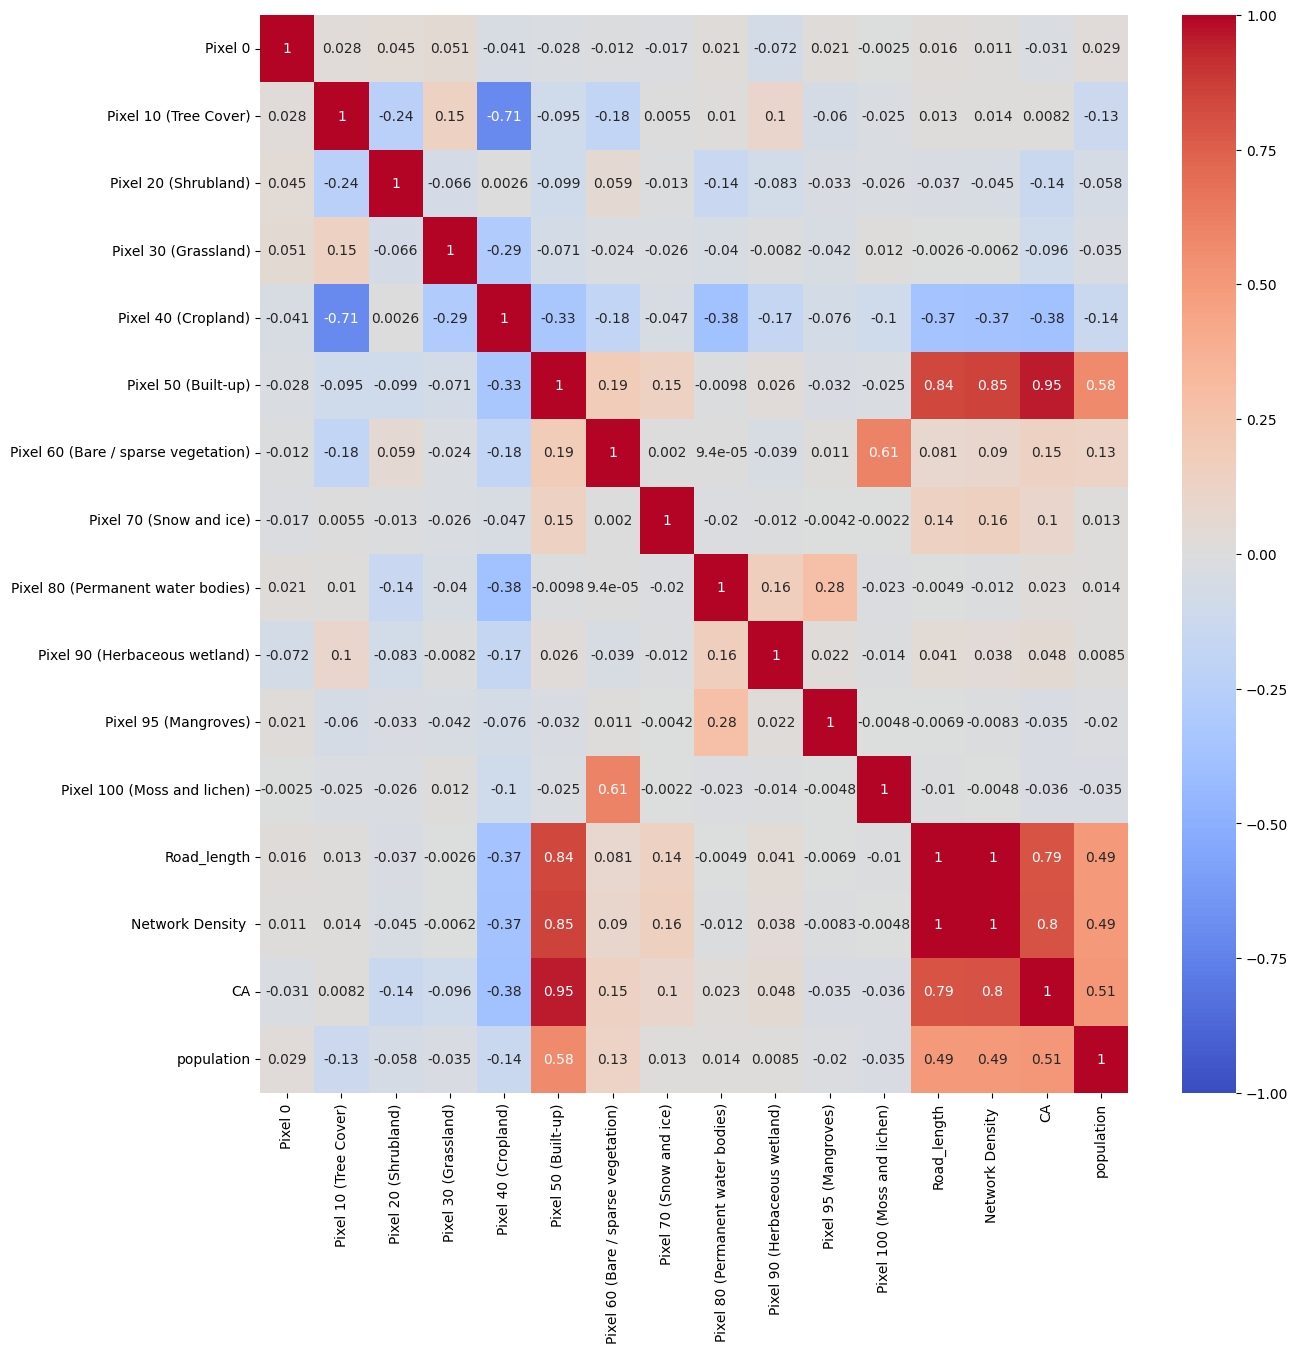

In [3]:
plt.figure(figsize=(14,14))
PCM = sns.heatmap(dataset_df.corr(method='pearson'), vmin=-1, cmap="coolwarm", annot=True)
# PCM = PCM.figure
# PCM.savefig("Pearson Correlation Matrix.png")

# Spearman Matrix

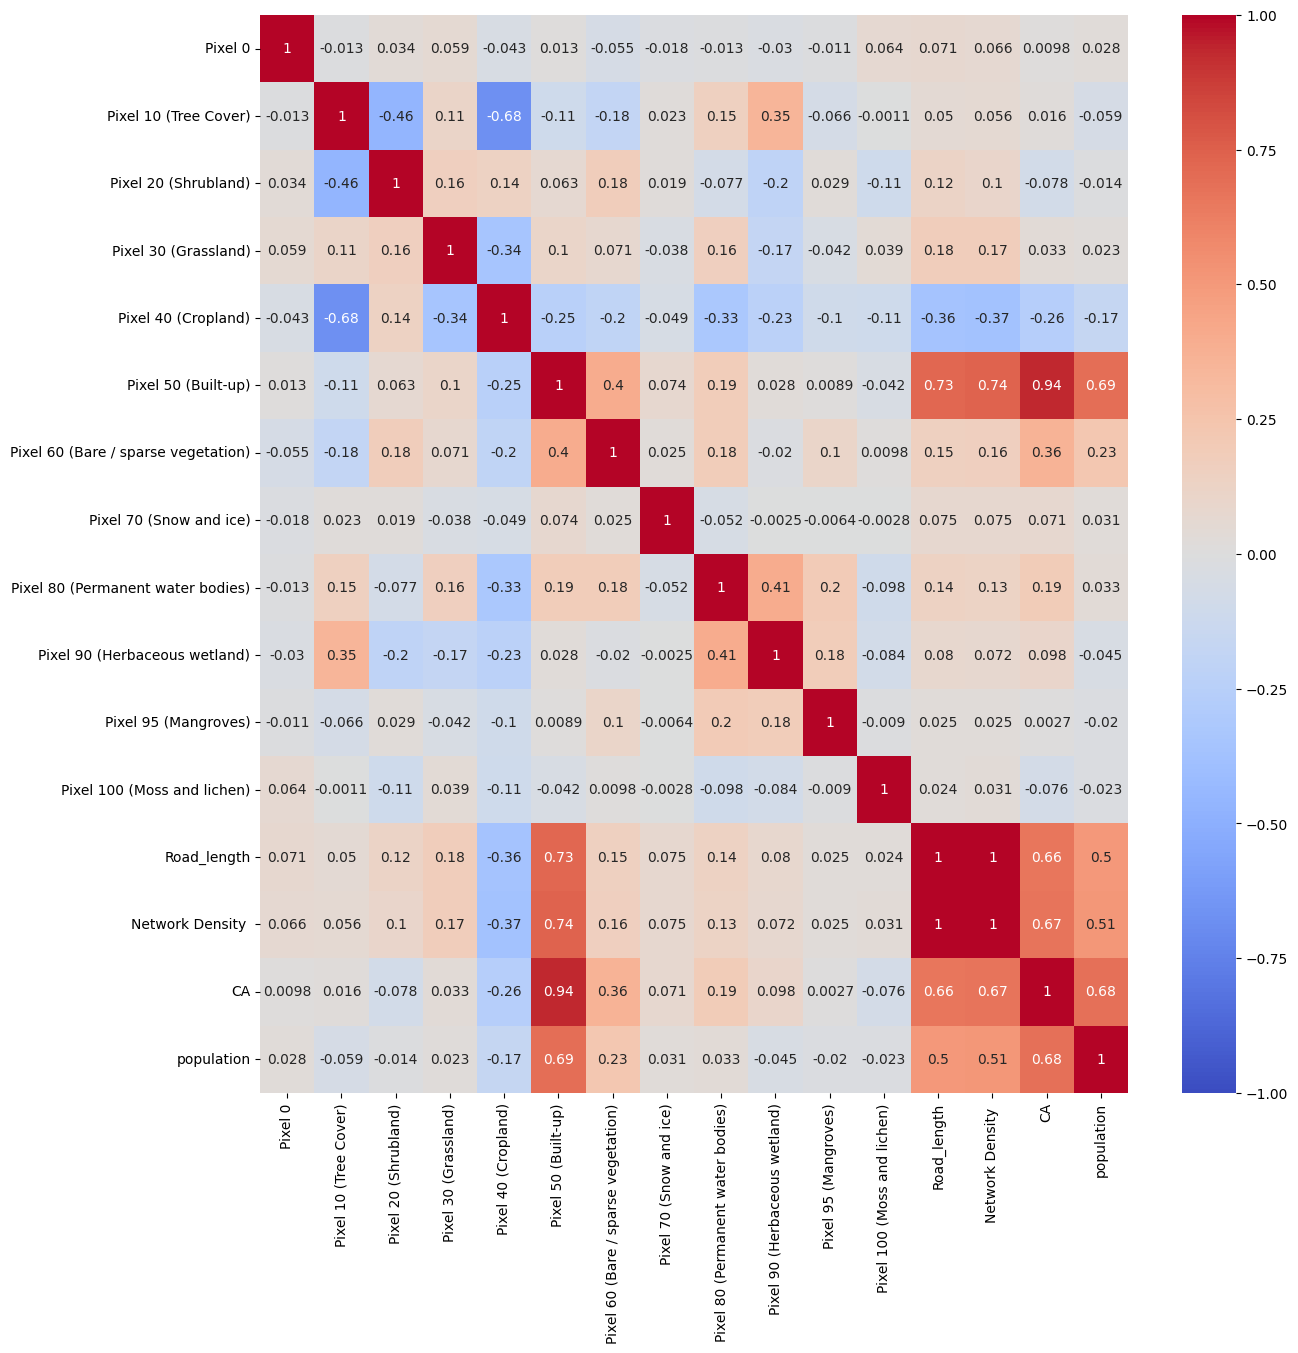

In [5]:
plt.figure(figsize=(14,14))
SM = sns.heatmap(dataset_df.corr(method='spearman'), vmin=-1, cmap="coolwarm", annot=True)
SM = SM.figure
# SM.savefig("Spearman Correlation Matrix.png")

# Kendall Matrix

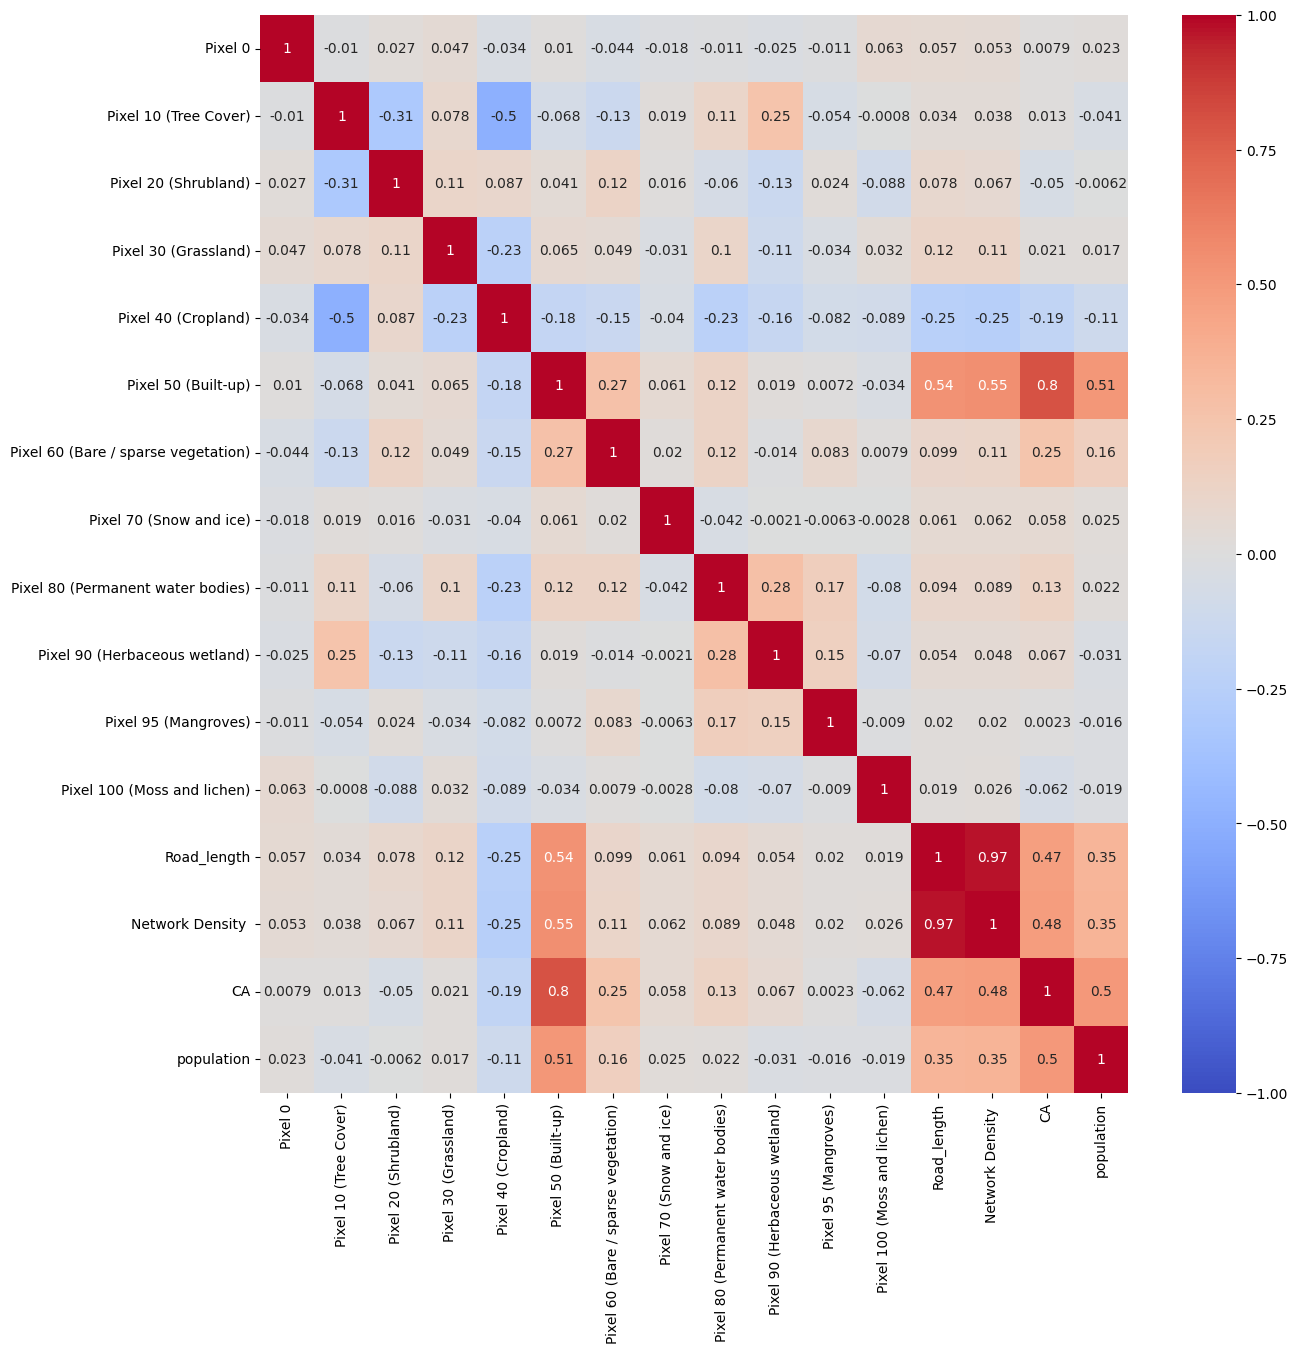

In [6]:
plt.figure(figsize=(14,14))
KM = sns.heatmap(dataset_df.corr(method='kendall'), vmin=-1, cmap="coolwarm", annot=True)
# KM = KM.figure
# KM.savefig("Kendall Correlation Matrix.png")

# CCC Matrix

In [7]:
def coef(data):
    matrix = np.zeros((data.shape[1], data.shape[1]))
    for i in range(data.shape[1]):
        for j in range(data.shape[1]):
            df01 = pd.DataFrame(zip(data.iloc[:,i], data.iloc[:,j]), columns=["x","y"])
            df01["yranks"] = df01["y"].rank()
            df01 = df01.sort_values("x")
            rank_series = df01["yranks"].reset_index(drop=True)
            #rank_series
            diff=[]
            for k in range(len(rank_series)-1):
                diff.append(abs(rank_series[k+1]-rank_series[k]))
            f=1-3*(sum(diff)/(df01.shape[0]**2-1))
            matrix[i,j] = f
    return matrix

a = coef(dataset_df)
    
dataset_df_CCC = pd.DataFrame(a, columns=dataset_df.columns, index=dataset_df.columns).round(3)

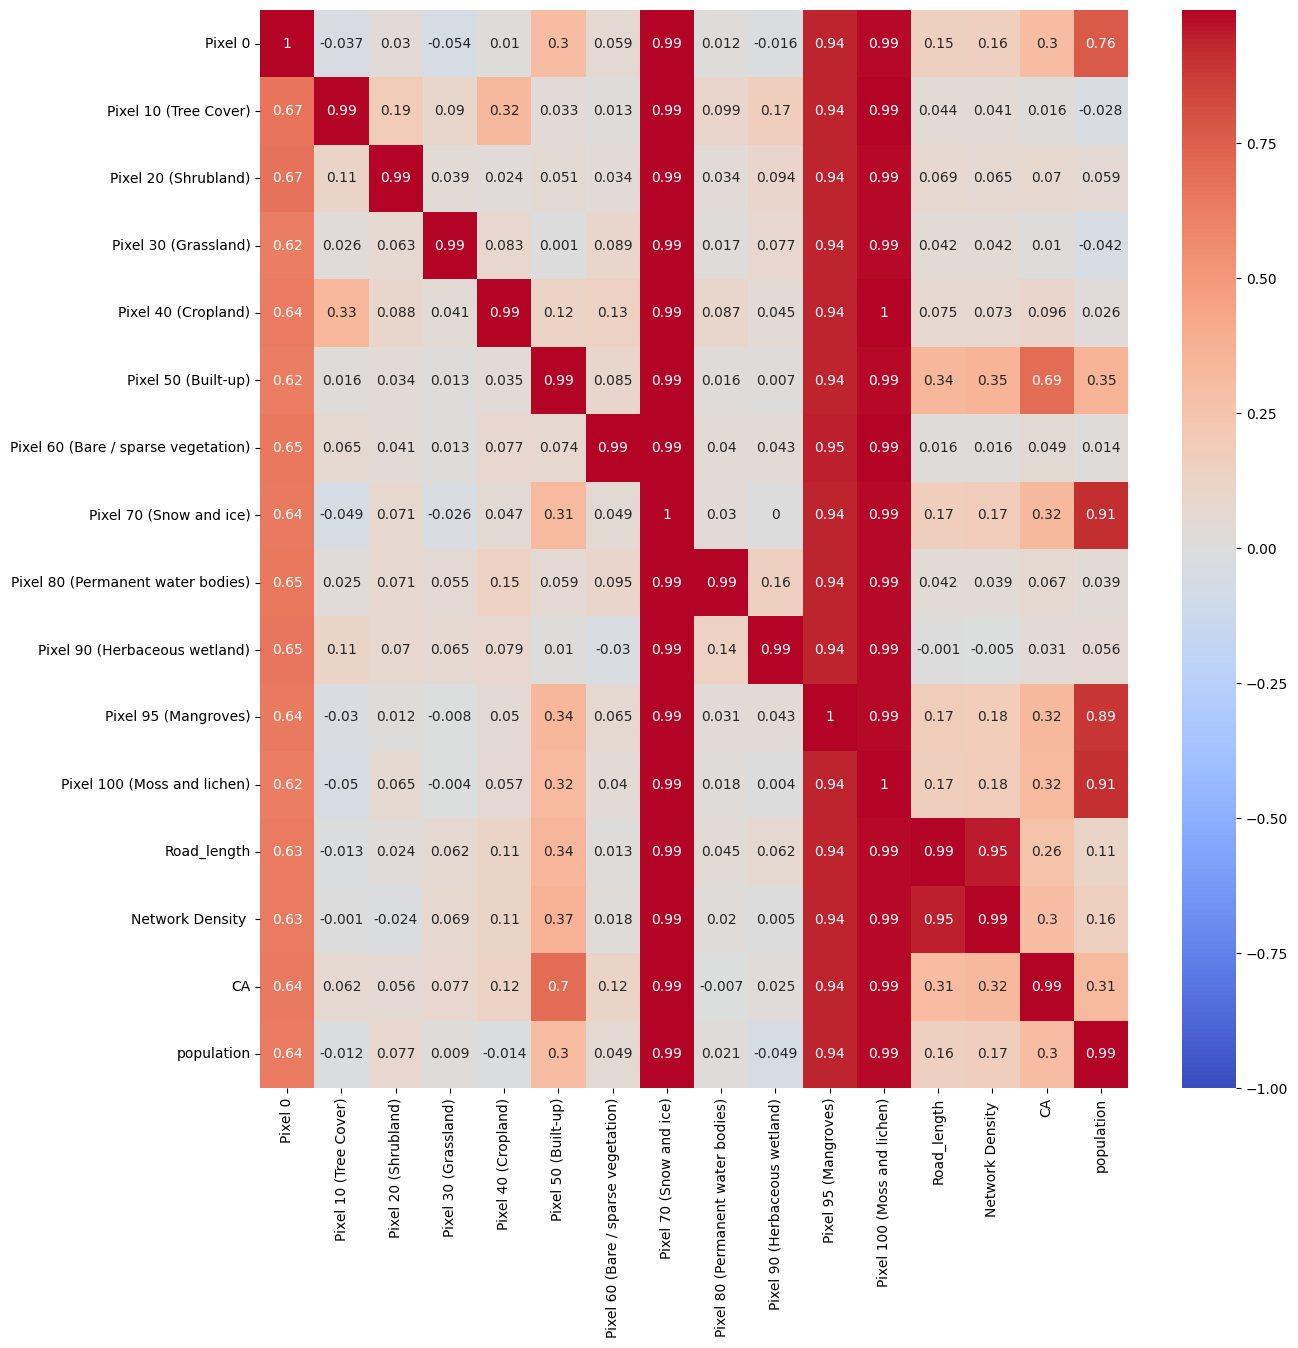

In [8]:
plt.figure(figsize=(14,14))
CCC = sns.heatmap(dataset_df_CCC, vmin=-1, cmap="coolwarm", annot=True)
# CCC = CCC.figure
# CCC.savefig("Chatterjee Correlation Matrix.png")

# CLR Transformation

In [11]:
dataset_df.columns

pandas.core.indexes.base.Index

In [16]:
# labels_All = ["sl.num", "Grid Number", "City name","Road_length", "Alpha", "Beta", "Gamma", "GTP", "Eta", "Network Density ", "Edge Graph Density", "Nodal Graph Density", "population", " CLUMPY ", " NLSI", " AI ", " NP ", " LPI " ]
labels_All = dataset_df.columns.to_list()

In [19]:
CLR_Tranformed_DF = pd.DataFrame()

In [20]:
for col in labels_All:
    
    if col == "Grid Number" or col == "City name":
        CLR_Tranformed_DF[col] = dataset_df[col]
    else:   
        clr_trans = clr(dataset_df[col])
        CLR_Tranformed_DF[col] = clr_trans

/home/satvik/anaconda3/lib/python3.10/site-packages/skbio/stats/composition.py:464: RuntimeWarning: divide by zero encountered in log
  lmat = np.log(mat)
/home/satvik/anaconda3/lib/python3.10/site-packages/skbio/stats/composition.py:466: RuntimeWarning: invalid value encountered in subtract
  return (lmat - gm).squeeze()
/home/satvik/anaconda3/lib/python3.10/site-packages/skbio/stats/composition.py:464: RuntimeWarning: divide by zero encountered in log
  lmat = np.log(mat)
/home/satvik/anaconda3/lib/python3.10/site-packages/skbio/stats/composition.py:466: RuntimeWarning: invalid value encountered in subtract
  return (lmat - gm).squeeze()
/home/satvik/anaconda3/lib/python3.10/site-packages/skbio/stats/composition.py:464: RuntimeWarning: divide by zero encountered in log
  lmat = np.log(mat)
/home/satvik/anaconda3/lib/python3.10/site-packages/skbio/stats/composition.py:466: RuntimeWarning: invalid value encountered in subtract
  return (lmat - gm).squeeze()
/home/satvik/anaconda3/lib/p

In [21]:
CLR_Tranformed_DF.head()

,Pixel 0,Pixel 10 (Tree Cover),Pixel 20 (Shrubland),Pixel 30 (Grassland),Pixel 40 (Cropland),Pixel 50 (Built-up),Pixel 60 (Bare / sparse vegetation),Pixel 70 (Snow and ice),Pixel 80 (Permanent water bodies),Pixel 90 (Herbaceous wetland),Pixel 95 (Mangroves),Pixel 100 (Moss and lichen),Road_length,Network Density,CA,population
0,NaN,1.152277,inf,-0.095157,-2.427711,2.071694,-0.363062,NaN,inf,inf,NaN,NaN,1.802218,1.860687,1.942428,1.175044
1,inf,0.295299,inf,1.444735,0.133017,1.234197,0.293370,NaN,inf,NaN,NaN,NaN,1.434104,1.403229,0.970608,1.844228
2,NaN,-1.899404,inf,0.332157,0.258536,1.627296,1.030959,NaN,inf,inf,NaN,NaN,1.700372,1.676941,1.408595,1.834880
3,NaN,-1.102490,inf,-1.274151,0.178129,1.440912,1.055939,NaN,inf,inf,inf,NaN,1.536081,1.544364,1.304404,1.827211
4,NaN,-1.459709,inf,1.399135,0.268928,1.258735,0.864779,NaN,inf,NaN,NaN,NaN,1.313217,1.310855,1.018129,1.825444


# CLR Transforrmed PCM

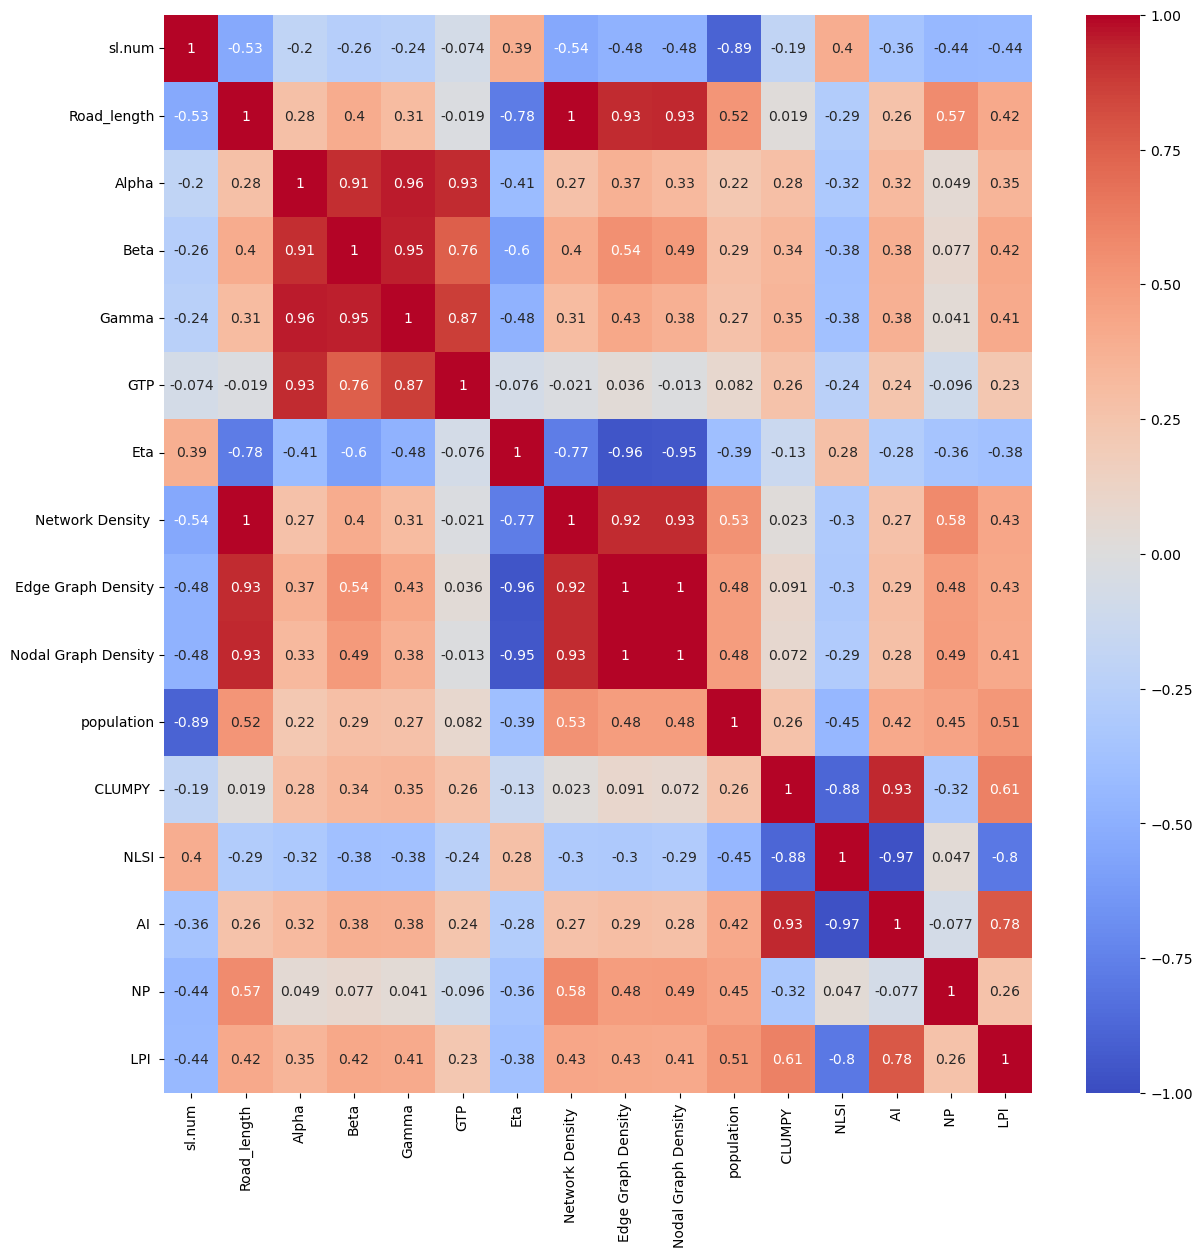

In [58]:
plt.figure(figsize=(14,14))
clr_PCM = sns.heatmap(CLR_Tranformed_DF.corr(method='pearson'), vmin=-1, cmap="coolwarm", annot=True)
clr_PCM = clr_PCM.figure
clr_PCM.savefig("CLR_Pearson Correlation Matrix.png")

# CLR Transformed SM

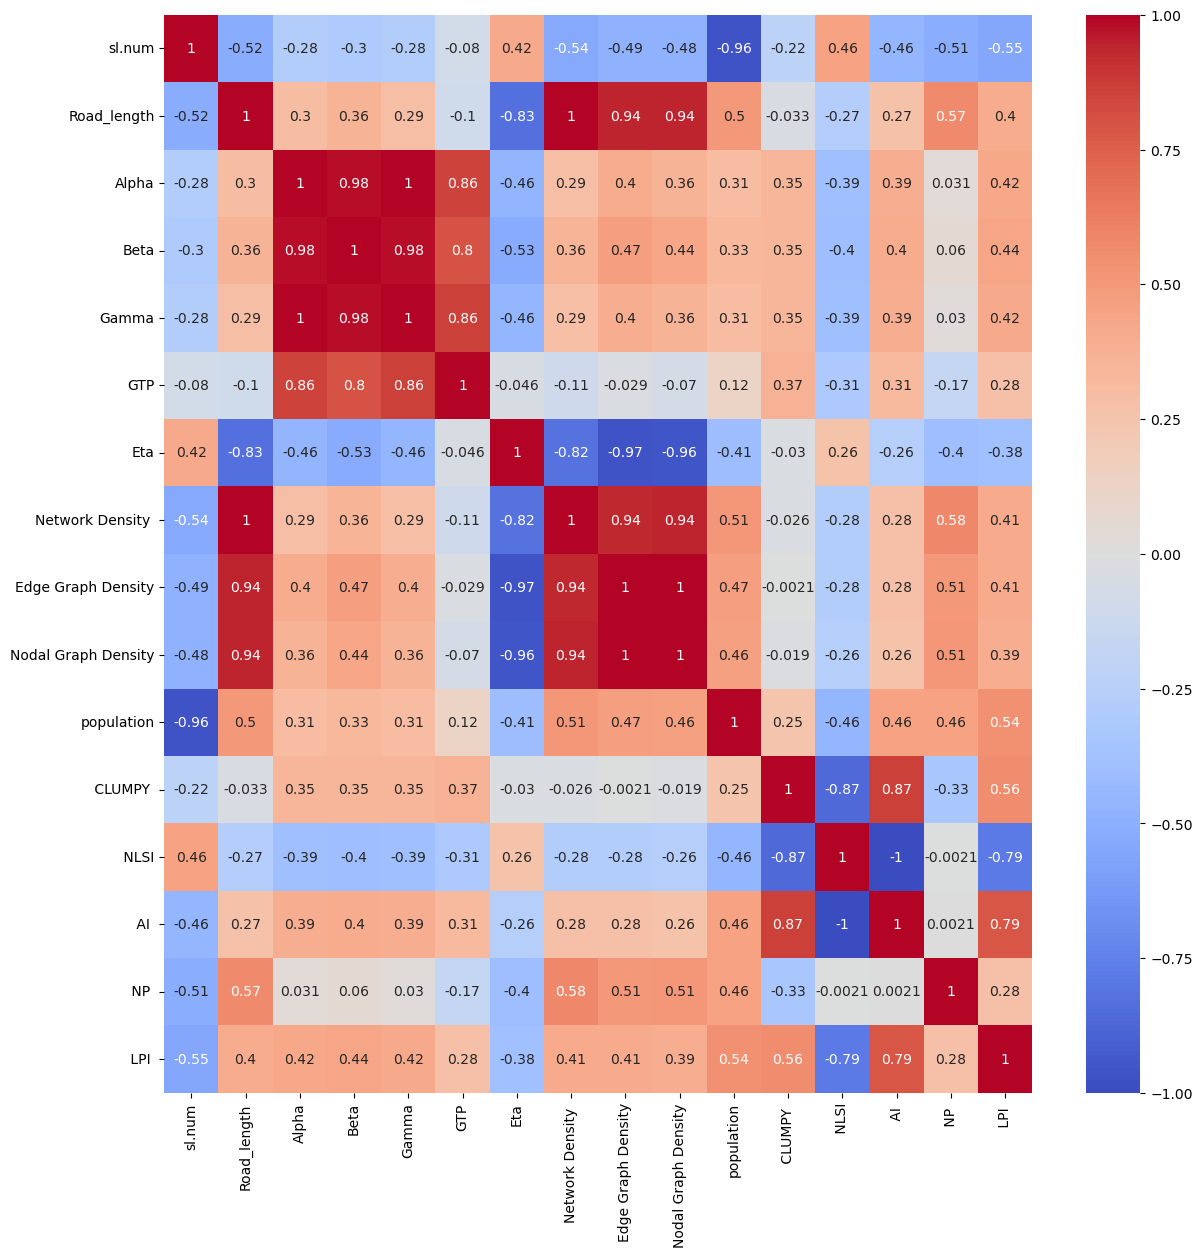

In [59]:
plt.figure(figsize=(14,14))
clr_SM = sns.heatmap(CLR_Tranformed_DF.corr(method='spearman'), vmin=-1, cmap="coolwarm", annot=True)
clr_SM = clr_SM.figure
clr_SM.savefig("CLR_Spearman Correlation Matrix.png")

# CLR Transformed KM

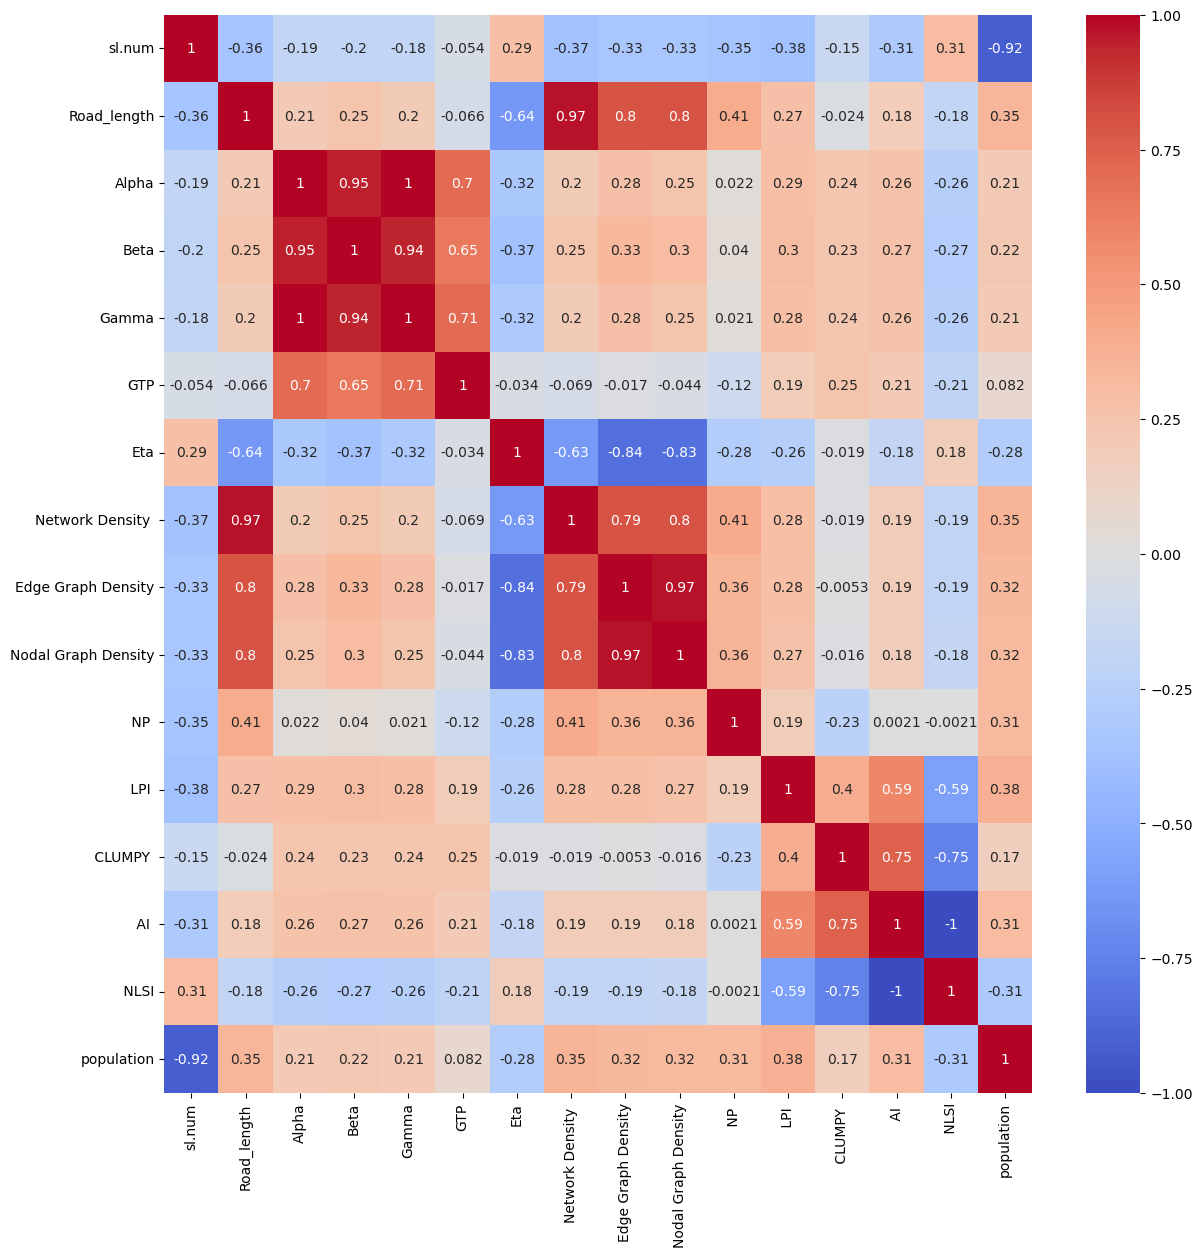

In [60]:
plt.figure(figsize=(14,14))
clr_KM = sns.heatmap(dataset_df.corr(method='kendall'), vmin=-1, cmap="coolwarm", annot=True)
clr_KM = clr_KM.figure
clr_KM.savefig("CLR_Kendall Correlation Matrix.png")

# CLR Transformed CCC

In [61]:
def coef(data):
    matrix = np.zeros((data.shape[1], data.shape[1]))
    for i in range(data.shape[1]):
        for j in range(data.shape[1]):
            df01 = pd.DataFrame(zip(data.iloc[:,i], data.iloc[:,j]), columns=["x","y"])
            df01["yranks"] = df01["y"].rank()
            df01 = df01.sort_values("x")
            rank_series = df01["yranks"].reset_index(drop=True)
            #rank_series
            diff=[]
            for k in range(len(rank_series)-1):
                diff.append(abs(rank_series[k+1]-rank_series[k]))
            f=1-3*(sum(diff)/(df01.shape[0]**2-1))
            matrix[i,j] = f
    return matrix

a = coef(CLR_Tranformed_DF)
    
clr_dataset_df_CCC = pd.DataFrame(a, columns=CLR_Tranformed_DF.columns, index=CLR_Tranformed_DF.columns).round(3)

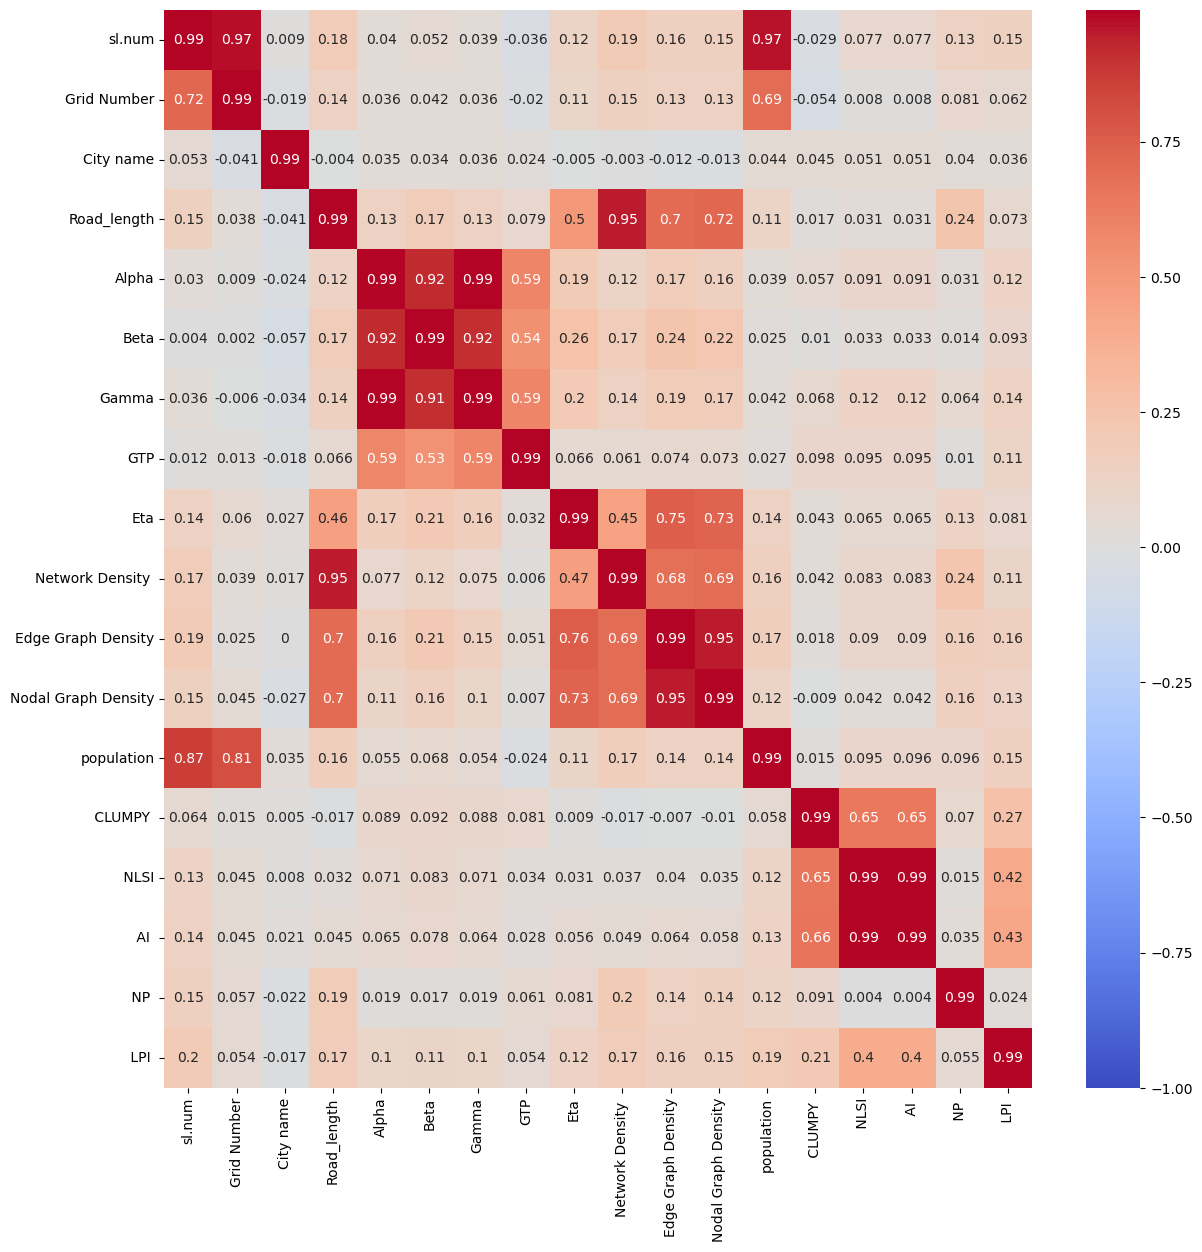

In [62]:
plt.figure(figsize=(14,14))
clr_CCC = sns.heatmap(clr_dataset_df_CCC, vmin=-1, cmap="coolwarm", annot=True)
clr_CCC = clr_CCC.figure
clr_CCC.savefig("CLR_Chatterjee Correlation Matrix.png")

# 